In [20]:
%matplotlib inline

# Important: We are using PIL to read .png files later.
# This was done on purpose to read indexed png files
# in a special way -- only indexes and not map the indexes
# to actual rgb values. This is specific to PASCAL VOC
# dataset data. If you don't want thit type of behaviour
# consider using skimage.io.imread()
from PIL import Image
import numpy as np
import skimage.io as io
import tensorflow as tf

In [1]:
sample_submission = pd.read_csv("../asset/sample_submission.csv")

In [3]:
sample_submission.shape

(7960, 2)

In [21]:
train = pd.read_csv("../asset/train.csv")

In [22]:
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [23]:
train.shape

(25361, 2)

In [24]:
len(train.Id.unique())

5005

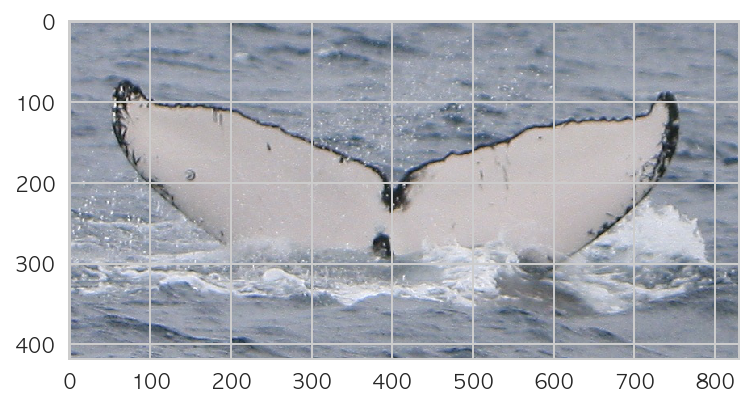

In [25]:
r = random.randint(0, len(train) - 1)
img = mpimg.imread("../asset/train/" + train.Image[r])
imgplot = plt.imshow(img)
plt.show()

In [26]:
file_base_url = "../asset/train/"

In [27]:
filename_pairs = [file_base_url + img for img in train.Image]

In [1]:
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def write_tfrecofds(filename_pairs):
    tfrecords_filename = 'whale.tfrecords'
    writer = tf.python_io.TFRecordWriter(tfrecords_filename)

    # Let's collect the real images to later on compare
    # to the reconstructed ones
    original_images = []

    for img_path in filename_pairs:

        img = np.array(Image.open(img_path))

        # The reason to store image sizes was demonstrated
        # in the previous example -- we have to know sizes
        # of images to later read raw serialized string,
        # convert to 1d array and convert to respective
        # shape that image used to have.
        height = img.shape[0]
        width = img.shape[1]

        # Put in the original images into array
        # Just for future check for correctness
        original_images.append(img)

        img_raw = img.tostring()

        example = tf.train.Example(features=tf.train.Features(feature={
            'height': _int64_feature(height),
            'width': _int64_feature(width),
            'image_raw': _bytes_feature(img_raw)}))

        writer.write(example.SerializeToString())

    writer.close()